# Урок 8. Снижение размерности данных 

# !!!!Сначала масштабирование, потом все остальное.
Кстати, они уже отмасштабированы. Я бы даже сказал, что можно так сдавать
Хотя я бы привел в порядок масштабирование признаков до разбиения. Мог бы выкинуть лишнее. Подумать над этим

In [45]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import model_selection

In [46]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

## train_PCA

In [47]:
# Для начала отмасштабируем выборку
X_train = X_train.astype(float)

rows, cols = X_train.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_train.mean(0)
for i in range(rows):
    for j in range(cols):
        X_train[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_train, axis=0)
for i in range(cols):
    for j in range(rows):
        X_train[j][i] /= std[i]

In [48]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_train.T.dot(X_train)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
303.0633053524197
98.51109821736559
16.630055104400416
1.7955413258147255


In [49]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[72.15792984581414, 23.455023385087017, 3.9595369296191425, 0.42750983947969606]
Кумулятивная доля дисперсии по компонентам 
[ 72.15792985  95.61295323  99.57249016 100.        ]


In [50]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.53412301 -0.30791713]
 [-0.22791604 -0.94856275]
 [ 0.58442075 -0.01976354]
 [ 0.5667621  -0.07088833]]


In [51]:
# Сформируем новую матрицу "объекты-признаки"
Z_train = X_train.dot(W)

### test_PCA

In [52]:
# Для начала отмасштабируем выборку
X_test = X_test.astype(float)

rows, cols = X_test.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_train.mean(0)
# means = X_test.mean(0)
for i in range(rows):
    for j in range(cols):
        X_test[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_train, axis=0)
# std = np.std(X_test, axis=0)
for i in range(cols):
    for j in range(rows):
        X_test[j][i] /= std[i]

In [53]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_test.T.dot(X_test)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
2832.2741395521334
97.21567022761928
2.122361174386693
1.3878290458600109


Оценим долю дисперсии, которая описывается найденными компонентами.

In [54]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[96.56577359536767, 3.3145472290357754, 0.07236144474554017, 0.04731773085100618]
Кумулятивная доля дисперсии по компонентам 
[ 96.5657736   99.88032082  99.95268227 100.        ]


In [55]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.75394113  0.26489456]
 [ 0.38082287  0.56624058]
 [ 0.50881714 -0.71127657]
 [ 0.16628843 -0.32138469]]


In [56]:
# Сформируем новую матрицу "объекты-признаки"
Z_test = X_test.dot(W)

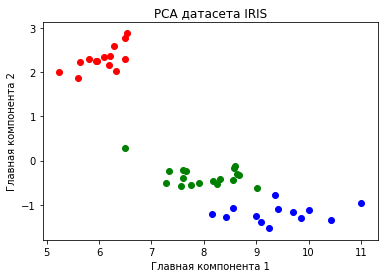

In [57]:
plt.figure()
y_test
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z_test[y_test==i, 0], Z_test[y_test==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [58]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [59]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [38]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

#### Вычислим точность алгоритма kNN

In [39]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма без PCA при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма без PCA при k = 3: 0.933


#### Вычислим точность алгоритма kNN для 2 компонент PCA

In [40]:
y_pred_PCA = knn(Z_train, y_train, Z_test, k)

print(f'Точность алгоритма без PCA при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма c PCA при k = {k}: {accuracy(y_pred_PCA, y_test):.3f}')

Точность алгоритма без PCA при k = 3: 0.933
Точность алгоритма c PCA при k = 3: 0.911


#### Вычислим точность алгоритма kNN для 3 компонент PCA

In [41]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
W = np.concatenate((W, eig_pairs[2][1].reshape(4,1)), axis=1)
Z_train = X_train.dot(W)
Z_test = X_test.dot(W)

In [42]:
y_pred_PCA = knn(Z_train, y_train, Z_test, k)

print(f'Точность алгоритма c PCA при k = {k}: {accuracy(y_pred_PCA, y_test):.3f}')

Точность алгоритма c PCA при k = 3: 0.956


#### Вычислим точность алгоритма kNN для 4 компонент PCA

In [43]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
W = np.concatenate((W, eig_pairs[2][1].reshape(4,1)), axis=1)
W = np.concatenate((W, eig_pairs[3][1].reshape(4,1)), axis=1)
Z_train = X_train.dot(W)
Z_test = X_test.dot(W)

In [44]:
y_pred_PCA = knn(Z_train, y_train, Z_test, k)

print(f'Точность алгоритма c PCA при k = {k}: {accuracy(y_pred_PCA, y_test):.3f}')

Точность алгоритма c PCA при k = 3: 0.933


## Дополнительные материалы

1. [Методы отбора признаков](https://habr.com/ru/company/aligntechnology/blog/303750/)
2. [Взаимная информация](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F)
3. [Методы понижения размерности](http://www.machinelearning.ru/wiki/images/0/06/SLT%2C_lecture_8.pdf)
4. [Лемма о малом искажении](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0_%D0%BE_%D0%BC%D0%B0%D0%BB%D0%BE%D0%BC_%D0%B8%D1%81%D0%BA%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8)
5. [PCA from Scratch in Python](https://github.com/bhattbhavesh91/pca-from-scratch-iris-dataset)

## Домашнее задание

1. (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)
2. (*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.